# Numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex

## 1 `np.array`操作

### 1.1 - 生成数据、初始化

#### 1.1.1 指定数据

In [2]:
"""
If the list contains all ints then the created array will also have a data type of int, 
otherwise it will be float.
"""
np.array([1., 0, 0, 0, 0, 0])

array([1., 0., 0., 0., 0., 0.])

In [3]:
np.array(range(10))**2

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [4]:
# 对角矩阵
np.diag([500., 49.])

array([[500.,   0.],
       [  0.,  49.]])

#### 1.1.2 随机数据

In [5]:
# 创建2行2列取值范围为[0,1)的数组
np.random.rand(2,2)

array([[0.40565084, 0.96110642],
       [0.17262733, 0.35785805]])

In [6]:
# 创建2行3列，取值范围为标准正态分布的数组
np.random.randn(2,3)

array([[-1.26724422, -0.06001476, -0.16686296],
       [-1.12466977, -0.97529199,  0.71501909]])

#### 1.1.3 生成坐标
**e.g.** 生成二维坐标

In [7]:
row, col = np.indices((2, 3))

row, col

(array([[0, 0, 0],
        [1, 1, 1]]),
 array([[0, 1, 2],
        [0, 1, 2]]))

In [8]:
print(np.ravel(row))
print(np.ravel(col))

[0 0 0 1 1 1]
[0 1 2 0 1 2]


**e.g.** 生成二维坐标

In [9]:
x = np.arange(-2, 2, 0.1)
y = np.arange(-2, 2, 0.1)

xv, yv = np.meshgrid(x, y)

xv, yv

(array([[-2. , -1.9, -1.8, ...,  1.7,  1.8,  1.9],
        [-2. , -1.9, -1.8, ...,  1.7,  1.8,  1.9],
        [-2. , -1.9, -1.8, ...,  1.7,  1.8,  1.9],
        ...,
        [-2. , -1.9, -1.8, ...,  1.7,  1.8,  1.9],
        [-2. , -1.9, -1.8, ...,  1.7,  1.8,  1.9],
        [-2. , -1.9, -1.8, ...,  1.7,  1.8,  1.9]]),
 array([[-2. , -2. , -2. , ..., -2. , -2. , -2. ],
        [-1.9, -1.9, -1.9, ..., -1.9, -1.9, -1.9],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        ...,
        [ 1.7,  1.7,  1.7, ...,  1.7,  1.7,  1.7],
        [ 1.8,  1.8,  1.8, ...,  1.8,  1.8,  1.8],
        [ 1.9,  1.9,  1.9, ...,  1.9,  1.9,  1.9]]))

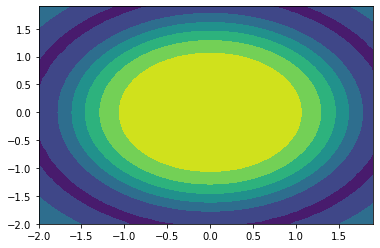

In [10]:
z = np.sin(xv**2 + yv**2) / (xv**2 + yv**2)
h = plt.contourf(x,y,z)
plt.show()

### 1.2 读取数据
#### 1.2.1 任意多个位置

In [11]:
a = np.array(range(10))**2

a[[0, 2]]

array([0, 4])

#### 1.2.2 Assign all rows/cols of a matrix to variables

In [12]:
a = np.array([[1,2,3],
              [1,2,3]])

In [13]:
r1, r2 = a

r1, r2

(array([1, 2, 3]), array([1, 2, 3]))

In [14]:
c1, c2, c3 = a.transpose()

c1, c2, c3

(array([1, 1]), array([2, 2]), array([3, 3]))

### 1.3 克隆
克隆时候最好把`dtype`也一起带上

In [15]:
"""A = matplotlib.image.imread('pic.jpg')
   注意此时A.dtype为uint8
"""
A = np.zeros((100, 100), dtype=np.uint8)
B = np.zeros_like(A)

"""numpy默认数据类型是float64
   此时A和B的dtype不一样!!!
"""
B = np.zeros(A.shape)
print(A.dtype, "\=", B.dtype)

B1 = np.zeros(A.shape, dtype=A.dtype)
print(A.dtype, "=", B1.dtype)

uint8 \= float64
uint8 = uint8


### 1.4 运算
#### 1.4.1 `np.matmul(A,B)`
请注意W.shape

In [16]:
W = np.arange(2)
X = np.arange(6).reshape(3, 2)
b = 1

res1 = np.matmul(W, X.T) + b
res2 = np.matmul(X, W) + b

print('X.shape:', X.shape, '\nW.shape:', W.shape)
display(Math("W*X^T = \\text{%s}"%(res1)))
display(Math("X*W = \\text{%s}"%(res2)))

X.shape: (3, 2) 
W.shape: (2,)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

### 1.5 添加或删除

#### 1.5.1 Append to an array

In [17]:
a = np.array([1,2,3])

np.append(a, 3)

array([1, 2, 3, 3])

In [18]:
a = np.array([[1,2,3],
              [2,3,4]])
b = np.array([[4],
              [5]])

np.append(a, b, axis=1)

array([[1, 2, 3, 4],
       [2, 3, 4, 5]])

#### 1.5.2 Stack arrays
- `stack`: Join a sequence of arrays along **a new axis**. (shape会增加一个维度)
- `vstack`: Stack arrays in sequence vertically (row wise).
- `hstack`: Stack arrays in sequence horizontally (column wise).

**e.g.** 1D arrays - `stack`

In [19]:
a = np.array([1, 2, 3])
b = np.array([2, 3, 4])

In [20]:
np.stack((a,b), axis=0)

array([[1, 2, 3],
       [2, 3, 4]])

In [21]:
np.stack((a,b), axis=1)

array([[1, 2],
       [2, 3],
       [3, 4]])

**e.g.** 1D arrays - `hstack` and `vstack`

In [22]:
np.hstack((a,b))

array([1, 2, 3, 2, 3, 4])

In [23]:
np.vstack((a,b))

array([[1, 2, 3],
       [2, 3, 4]])

**e.g.** 2D arrays - `stack`

In [24]:
a = np.array([[1,2,3],
              [2,3,4]])
b = np.array([[1,2,3],
              [2,3,4]])

In [25]:
np.stack((a,b), axis=0)

array([[[1, 2, 3],
        [2, 3, 4]],

       [[1, 2, 3],
        [2, 3, 4]]])

In [26]:
np.stack((a,b), axis=1)

array([[[1, 2, 3],
        [1, 2, 3]],

       [[2, 3, 4],
        [2, 3, 4]]])

In [27]:
np.stack((a,b), axis=2)

array([[[1, 1],
        [2, 2],
        [3, 3]],

       [[2, 2],
        [3, 3],
        [4, 4]]])

**e.g.** 2D arrays - `vstack` and `hstack`

In [28]:
np.hstack((a,b))

array([[1, 2, 3, 1, 2, 3],
       [2, 3, 4, 2, 3, 4]])

#### 1.5.3 删除

In [29]:
a = [1,2,3,4]

a.pop(-1)
a

[1, 2, 3]

### 1.6 获取某些值的位置
#### 1.6.1 可以避免使用for循环

In [30]:
a = np.array([10, 11, 10, 12])

In [31]:
a == 10

array([ True, False,  True, False])

In [32]:
a[(a==10) | (a==12)]

array([10, 10, 12])

**e.g.** 更改array中的某些数值

In [33]:
a[a==11] = 2

a

array([10,  2, 10, 12])

## 2 Misc

### 2.1 打印精度设置
参考：
- [A `printf` format reference page (cheat sheet)](https://alvinalexander.com/programming/printf-format-cheat-sheet/)

此外，可以用`np.set_printoptions()`改变全局的设置

In [34]:
print('default:', np.array([2.0]) / 3)

with np.printoptions(precision=2):
    print('precision=2:', np.array([2.0]) / 3)

default: [0.66666667]
precision=2: [0.67]


In [35]:
with np.printoptions(formatter={'float':'{:8.2f}'.format}):
    print(np.array([12.2322, 2.2]))

[   12.23     2.20]


In [36]:
a = np.array([1,2,3,1,1])
a[a==1] = 2

a

array([2, 2, 3, 2, 2])

### 2.2 `np.arctan2()` 弧度、角度计算
`np.arctan()`不可以计算分母为0(90°)的情况，所以最好用`np.arctan2()`

In [37]:
np.arctan2(-10, 0) * 180 / np.pi

-90.0